# Title: Prdicting rental prices using Airbnb listings and metric information
1) Find out what investment properties and listing features drive growth following 3 objectives

a) Understand which features have influence on pricing of properties and the profitability of the propety_types.

b) Features which have impact on booking by understanding interest and preference
 
d) Feasibility of providing additional services in return for a fee such as laundry services by analysing effect of already provided cleaning services services on price

2) Train and test, 3 price predicting machine learning models, to find out which has the best predictive accuracy and performance. Predict price of properties and the annual revenue based on property features.

3) Make data driven reccommendations to drive growth

In [235]:
#import useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,KNNImputer
from sklearn.pipeline import FeatureUnion,make_pipeline,Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder #oneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR


In [236]:
#load the airbnb listing dataset fro seatle in USA
airbnb_df = pd.read_csv("C:/Users/naddy/OneDrive/Downloads/listings.txt", sep= ",")

In [237]:
#displays all the columns of the dataframe. 

pd.set_option('display.max_columns', 92)
display(airbnb_df)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [238]:
airbnb_df1 = airbnb_df.copy()

In [239]:
airbnb_df.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 92, dtype: object

# Examine the dataset 

In [240]:
#list of the 92 columns in the dataset
airbnb_df1.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [241]:
#get description statistics showing summary of numerical attributes
airbnb_df1.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [242]:
#get quick description of the data
airbnb_df1.info

<bound method DataFrame.info of             id                            listing_url       scrape_id  \
0       241032    https://www.airbnb.com/rooms/241032  20160104002432   
1       953595    https://www.airbnb.com/rooms/953595  20160104002432   
2      3308979   https://www.airbnb.com/rooms/3308979  20160104002432   
3      7421966   https://www.airbnb.com/rooms/7421966  20160104002432   
4       278830    https://www.airbnb.com/rooms/278830  20160104002432   
...        ...                                    ...             ...   
3813   8101950   https://www.airbnb.com/rooms/8101950  20160104002432   
3814   8902327   https://www.airbnb.com/rooms/8902327  20160104002432   
3815  10267360  https://www.airbnb.com/rooms/10267360  20160104002432   
3816   9604740   https://www.airbnb.com/rooms/9604740  20160104002432   
3817  10208623  https://www.airbnb.com/rooms/10208623  20160104002432   

     last_scraped                                 name  \
0      2016-01-04         Stylish

In [243]:
#checking the prices per day/week/month and the number of days the listing available for booking in one month,
#2 months ,3 month and  one year. 
availability_df = airbnb_df1[['price','weekly_price', 'monthly_price','has_availability','availability_30', 'availability_60', 
                                   'availability_90', 'availability_365', 'host_total_listings_count']]
availability_df 


,price,weekly_price,monthly_price,has_availability,availability_30,availability_60,availability_90,availability_365,host_total_listings_count
0,$85.00,NaN,NaN,t,14,41,71,346,3.0
1,$150.00,"$1,000.00","$3,000.00",t,13,13,16,291,6.0
2,$975.00,NaN,NaN,t,1,6,17,220,2.0
3,$100.00,$650.00,"$2,300.00",t,0,0,0,143,1.0
4,$450.00,NaN,NaN,t,30,60,90,365,2.0
...,...,...,...,...,...,...,...,...,...
3813,$359.00,NaN,NaN,t,18,32,32,32,354.0
3814,$79.00,NaN,NaN,t,6,26,44,273,1.0
3815,$93.00,$450.00,NaN,t,29,59,88,88,1.0
3816,$99.00,NaN,NaN,t,30,60,90,179,1.0


In [244]:
# check number of each unique value in the has_availability column.
#Assuming the t means yes, then listing was available for booking. it will me dropped since it contains
#only t in that whole column. 
airbnb_df1["has_availability"].value_counts()

t    3818
Name: has_availability, dtype: int64

In [245]:
#rename the availability_365 column to booked_365 assuming the values in the column indicates
#the number of days that the listing is available and booked in a year
airbnb_df1.rename(columns={"availability_365" : "booked_365"}, inplace=True)

In [246]:
airbnb_df1["booked_365"]

0       346
1       291
2       220
3       143
4       365
       ... 
3813     32
3814    273
3815     88
3816    179
3817      7
Name: booked_365, Length: 3818, dtype: int64

In [247]:
airbnb_df1["booked_365"].isnull().sum()

0

In [248]:
#function to convert object to float and remove dollar sign
def delete_dollar_sign(value):
    if pd.isna(value):
        return np.NaN
    else:
        return float(value.replace("$","").replace(",","").replace(" ",""))


In [249]:
#convert  the response variable - price to float and remove dollar sign
airbnb_df1["price"]=airbnb_df1["price"].apply(lambda x: delete_dollar_sign(x))
airbnb_df1["price"]

0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64

In [250]:
#remove dollar sign and convert to float
airbnb_df1["cleaning_fee"]=airbnb_df1["cleaning_fee"].apply(lambda x: delete_dollar_sign(x))
airbnb_df1["cleaning_fee"]


0         NaN
1        40.0
2       300.0
3         NaN
4       125.0
        ...  
3813    230.0
3814     50.0
3815     35.0
3816     45.0
3817      NaN
Name: cleaning_fee, Length: 3818, dtype: float64

In [251]:
#remove dollar sign and convert to float
airbnb_df1["extra_people"]=airbnb_df1["extra_people"].apply(lambda x: delete_dollar_sign(x))
airbnb_df1["extra_people"]

0        5.0
1        0.0
2       25.0
3        0.0
4       15.0
        ... 
3813     0.0
3814    25.0
3815    20.0
3816     0.0
3817     0.0
Name: extra_people, Length: 3818, dtype: float64

In [252]:
#Filling in the cleaning service with zeros because assuming that not all host provide cleaning services
#perhaps the prices are lower for such places 
airbnb_df1["cleaning_fee"].fillna(0, inplace=True)


In [253]:
#check number of missing values. will fill in together with the other numerical values.
airbnb_df1["cleaning_fee"].isnull().sum()

0

In [254]:
#checking the transformed column
airbnb_df1["cleaning_fee"]

0         0.0
1        40.0
2       300.0
3         0.0
4       125.0
        ...  
3813    230.0
3814     50.0
3815     35.0
3816     45.0
3817      0.0
Name: cleaning_fee, Length: 3818, dtype: float64

In [255]:
#creating  a new column annual_revenue and filling it with the product of price and booked_365 column
airbnb_df1['annual_revenue'] = airbnb_df1['price'] * airbnb_df1["booked_365"]

In [256]:
#creating a new column by dividing booked_365 by the number of days in a year
airbnb_df1['booking_probability'] = airbnb_df1["booked_365"].div(365) * 100

In [257]:
#display  the newly added columns
airbnb_df1[[ 'annual_revenue', 'booking_probability']]

,annual_revenue,booking_probability
0,29410.0,94.794521
1,43650.0,79.726027
2,214500.0,60.273973
3,14300.0,39.178082
4,164250.0,100.000000
...,...,...
3813,11488.0,8.767123
3814,21567.0,74.794521
3815,8184.0,24.109589
3816,17721.0,49.041096


# Handling missing data

In [258]:
#checking what percentage of the data is missing in each column
missing_values_percent =  airbnb_df1.isnull().sum() * 100/len(airbnb_df1)
missing_values_percent.sort_values(ascending = False)


license                100.000000
square_feet             97.459403
monthly_price           60.267156
security_deposit        51.126244
weekly_price            47.380828
                          ...    
bed_type                 0.000000
amenities                0.000000
price                    0.000000
cleaning_fee             0.000000
booking_probability      0.000000
Length: 94, dtype: float64

In [30]:
#check these columns to find out if they have any variations that may be useful in the model training
airbnb_df1[["country_code", "country", "city", "state", "smart_location", "host_verifications", "host_location", "host_about",
                "jurisdiction_names", "market", "requires_license"]]

,country_code,country,city,state,smart_location,host_verifications,host_location,host_about,jurisdiction_names,market,requires_license
0,US,United States,Seattle,WA,"Seattle, WA","['email', 'phone', 'reviews', 'kba']","Seattle, Washington, United States","I am an artist, interior designer, and run a s...",WASHINGTON,Seattle,f
1,US,United States,Seattle,WA,"Seattle, WA","['email', 'phone', 'facebook', 'linkedin', 're...","Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,WASHINGTON,Seattle,f
2,US,United States,Seattle,WA,"Seattle, WA","['email', 'phone', 'google', 'reviews', 'jumio']","Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,WASHINGTON,Seattle,f
3,US,United States,Seattle,WA,"Seattle, WA","['email', 'phone', 'facebook', 'reviews', 'jum...","Seattle, Washington, United States",NaN,WASHINGTON,Seattle,f
4,US,United States,Seattle,WA,"Seattle, WA","['email', 'phone', 'facebook', 'reviews', 'kba']","Seattle, Washington, United States","Hi, I live in Seattle, Washington but I'm orig...",WASHINGTON,Seattle,f
...,...,...,...,...,...,...,...,...,...,...,...
3813,US,United States,Seattle,WA,"Seattle, WA","['email', 'phone', 'linkedin', 'reviews', 'jum...",US,NaN,WASHINGTON,Seattle,f
3814,US,United States,Seattle,WA,"Seattle, WA","['email', 'phone', 'facebook', 'reviews', 'jum...","Seattle, Washington, United States",I am a 58 year old male that is married to Mag...,WASHINGTON,Seattle,f
3815,US,United States,Seattle,WA,"Seattle, WA",['phone'],US,NaN,WASHINGTON,Seattle,f
3816,US,United States,Seattle,WA,"Seattle, WA","['email', 'phone', 'facebook', 'reviews', 'kba']","Tacoma, Washington, United States",NaN,WASHINGTON,Seattle,f


In [31]:
# drop columns that have mostly same values all through 
airbnb_df1.drop(["country_code", "country", "state", "smart_location", "host_verifications", "host_location",
                "jurisdiction_names", "market", "requires_license"], axis=1, inplace=True)


In [32]:
airbnb_df1[["calendar_last_scraped", "host_name","host_id","host_picture_url", 
                   "street", "description", "calendar_updated", 
                     "scrape_id", "host_url", "last_scraped", "latitude", "host_thumbnail_url", 
                    "listing_url","longitude","name", "zipcode", 'neighbourhood_group_cleansed', 
                    "picture_url"]]

,calendar_last_scraped,host_name,host_id,host_picture_url,street,description,calendar_updated,scrape_id,host_url,last_scraped,latitude,host_thumbnail_url,listing_url,longitude,name,zipcode,neighbourhood_group_cleansed,picture_url
0,2016-01-04,Maija,956883,https://a0.muscache.com/ac/users/956883/profil...,"Gilman Dr W, Seattle, WA 98119, United States",Make your self at home in this charming one-be...,4 weeks ago,20160104002432,https://www.airbnb.com/users/show/956883,2016-01-04,47.636289,https://a0.muscache.com/ac/users/956883/profil...,https://www.airbnb.com/rooms/241032,-122.371025,Stylish Queen Anne Apartment,98119,Queen Anne,https://a1.muscache.com/ac/pictures/67560560/c...
1,2016-01-04,Andrea,5177328,https://a0.muscache.com/ac/users/5177328/profi...,"7th Avenue West, Seattle, WA 98119, United States",Chemically sensitive? We've removed the irrita...,today,20160104002432,https://www.airbnb.com/users/show/5177328,2016-01-04,47.639123,https://a0.muscache.com/ac/users/5177328/profi...,https://www.airbnb.com/rooms/953595,-122.365666,Bright & Airy Queen Anne Apartment,98119,Queen Anne,https://a0.muscache.com/ac/pictures/14409893/f...
2,2016-01-04,Jill,16708587,https://a1.muscache.com/ac/users/16708587/prof...,"West Lee Street, Seattle, WA 98119, United States",New modern house built in 2013. Spectacular s...,5 weeks ago,20160104002432,https://www.airbnb.com/users/show/16708587,2016-01-04,47.629724,https://a1.muscache.com/ac/users/16708587/prof...,https://www.airbnb.com/rooms/3308979,-122.369483,New Modern House-Amazing water view,98119,Queen Anne,https://a2.muscache.com/ac/pictures/b4324e0f-a...
3,2016-01-04,Emily,9851441,https://a2.muscache.com/ac/users/9851441/profi...,"8th Avenue West, Seattle, WA 98119, United States",A charming apartment that sits atop Queen Anne...,6 months ago,20160104002432,https://www.airbnb.com/users/show/9851441,2016-01-04,47.638473,https://a2.muscache.com/ac/users/9851441/profi...,https://www.airbnb.com/rooms/7421966,-122.369279,Queen Anne Chateau,98119,Queen Anne,https://a0.muscache.com/ac/pictures/94146944/6...
4,2016-01-04,Emily,1452570,https://a0.muscache.com/ac/users/1452570/profi...,"14th Ave W, Seattle, WA 98119, United States",Cozy family craftman house in beautiful neighb...,7 weeks ago,20160104002432,https://www.airbnb.com/users/show/1452570,2016-01-04,47.632918,https://a0.muscache.com/ac/users/1452570/profi...,https://www.airbnb.com/rooms/278830,-122.372471,Charming craftsman 3 bdm house,98119,Queen Anne,https://a1.muscache.com/ac/pictures/6120468/b0...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,2016-01-04,Bo,31148752,https://a2.muscache.com/ac/users/31148752/prof...,"Northwest 48th Street, Seattle, WA 98107, Unit...",Our 3BR/2BA house boasts incredible views of t...,today,20160104002432,https://www.airbnb.com/users/show/31148752,2016-01-04,47.664295,https://a2.muscache.com/ac/users/31148752/prof...,https://www.airbnb.com/rooms/8101950,-122.359170,3BR Mountain View House in Seattle,98107,Other neighborhoods,https://a2.muscache.com/ac/pictures/103217071/...
3814,2016-01-04,Glen,46566046,https://a2.muscache.com/ac/pictures/d7e59b0d-8...,"Fuhrman Avenue East, Seattle, WA 98102, United...",800 square foot 1 bedroom basement apartment w...,2 days ago,20160104002432,https://www.airbnb.com/users/show/46566046,2016-01-04,47.649552,https://a2.muscache.com/ac/pictures/d7e59b0d-8...,https://www.airbnb.com/rooms/8902327,-122.318309,Portage Bay View!-One Bedroom Apt,98102,Capitol Hill,https://a2.muscache.com/ac/pictures/626d4b1f-6...
3815,2016-01-04,Virginia,52791370,https://a2.muscache.com/ac/pictures/efc75826-1...,"South Laurel Street, Seattle, WA 98178, United...","Very comfortable lower unit. Quiet, charming m...",4 days ago,20160104002432,https://www.airbnb.com/users/show/52791370,2016-01-04,47.508453,https://a2.muscache.com/ac/pictures/efc75826-1...,https://www.airbnb.com/rooms/10267360,-122.240607,Private apartment view of Lake WA,98178,Rainier Valley,https

The following columns are being dropped after reviewing the dataset and the attributes that are relevant to the problem

In [33]:
#drop some columns that are host specific and generally not useful to the problem 
airbnb_df1.drop(["calendar_last_scraped", "host_name","host_id","host_picture_url", 
                   "street", "calendar_updated", 
                     "scrape_id", "host_url", "last_scraped", "host_thumbnail_url", 
                    "listing_url", "zipcode", 'neighbourhood_group_cleansed', 
                    "picture_url"],axis =1, inplace=True)


In [34]:
#check columns to determine how relevant they may be.
airbnb_df1[["availability_30","availability_60", "has_availability", "availability_90", 'xl_picture_url', "weekly_price",
               "host_total_listings_count",'thumbnail_url', 'medium_url', 'xl_picture_url', 'review_scores_accuracy',
                 'review_scores_location', 'review_scores_checkin','review_scores_accuracy','reviews_per_month', 
                 'first_review', 'last_review',
                'require_guest_profile_picture', "review_scores_communication"]].sample(10)

,availability_30,availability_60,has_availability,availability_90,xl_picture_url,weekly_price,host_total_listings_count,thumbnail_url,medium_url,xl_picture_url,review_scores_accuracy,review_scores_location,review_scores_checkin,review_scores_accuracy,reviews_per_month,first_review,last_review,require_guest_profile_picture,review_scores_communication
2296,0,0,t,4,https://a2.muscache.com/ac/pictures/69232941/2...,$800.00,2.0,https://a2.muscache.com/ac/pictures/69232941/2...,https://a2.muscache.com/im/pictures/69232941/2...,https://a2.muscache.com/ac/pictures/69232941/2...,8.0,9.0,10.0,8.0,0.24,2015-05-03,2015-06-13,f,10.0
3124,3,3,t,3,https://a2.muscache.com/ac/pictures/bf294cc5-8...,$500.00,1.0,https://a2.muscache.com/ac/pictures/bf294cc5-8...,https://a2.muscache.com/im/pictures/bf294cc5-8...,https://a2.muscache.com/ac/pictures/bf294cc5-8...,10.0,10.0,10.0,10.0,2.55,2015-11-19,2015-12-17,f,10.0
2616,22,52,t,82,https://a0.muscache.com/ac/pictures/13640044/4...,NaN,3.0,https://a0.muscache.com/ac/pictures/13640044/4...,https://a0.muscache.com/im/pictures/13640044/4...,https://a0.muscache.com/ac/pictures/13640044/4...,9.0,9.0,9.0,9.0,5.32,2013-02-04,2015-12-14,t,9.0
2866,28,58,t,88,https://a2.muscache.com/ac/pictures/d9415fc0-f...,"$1,200.00",1.0,https://a2.muscache.com/ac/pictures/d9415fc0-f...,https://a2.muscache.com/im/pictures/d9415fc0-f...,https://a2.muscache.com/ac/pictures/d9415fc0-f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
2244,30,60,t,89,https://a0.muscache.com/ac/pictures/47608284/f...,$475.00,1.0,https://a0.muscache.com/ac/pictures/47608284/f...,https://a0.muscache.com/im/pictures/47608284/f...,https://a0.muscache.com/ac/pictures/47608284/f...,9.0,8.0,10.0,9.0,1.24,2014-07-22,2015-09-01,f,10.0
2630,24,54,t,83,https://a2.muscache.com/ac/pictures/784da596-0...,NaN,7.0,https://a2.muscache.com/ac/pictures/784da596-0...,https://a2.muscache.com/im/pictures/784da596-0...,https://a2.muscache.com/ac/pictures/784da596-0...,10.0,10.0,10.0,10.0,3.00,2015-12-12,2015-12-26,f,10.0
908,2,14,t,44,https://a2.muscache.com/ac/pictures/82137790/7...,$235.00,1.0,https://a2.muscache.com/ac/pictures/82137790/7...,https://a2.muscache.com/im/pictures/82137790/7...,https://a2.muscache.com/ac/pictures/82137790/7...,9.0,9.0,10.0,9.0,2.86,2015-06-30,2015-11-25,f,10.0
2658,27,57,t,87,https://a0.muscache.com/ac/pictures/74441039/3...,NaN,2.0,https://a0.muscache.com/ac/pictures/74441039/3...,https://a0.muscache.com/im/pictures/74441039/3...,https://a0.muscache.com/ac/pictures/74441039/3...,10.0,10.0,10.0,10.0,4.14,2015-04-19,2015-11-22,f,10.0
2514,30,60,t,80,https://a1.muscache.com/ac/pictures/93228746/7...,$900.00,2.0,https://a1.muscache.com/ac/pictures/93228746/7...,https://a1.muscache.com/im/pictures/93228746/7...,https://a1.muscache.com/ac/pictures/93228746/7...,9.0,10.0,10.0,9.0,3.25,2015-06-16,2015-12-07,f,10.0
156,0,3,t,33,NaN,$300.00,2.0,NaN,NaN,NaN,10.0,10.0,10.0,10.0,1.25,2015-02-02,2015-10-26,f,10.0


In [35]:
#drop columns which are redundant or already have its information represented in another column wiith less missing values
airbnb_df1.drop(["availability_30","availability_60", "has_availability", "availability_90", 'xl_picture_url', "weekly_price",
               "host_total_listings_count",'thumbnail_url', 'medium_url', 'xl_picture_url', 'review_scores_accuracy',
                 'review_scores_location', 'review_scores_checkin','review_scores_accuracy','reviews_per_month', 
                 'first_review', 'last_review', "first_review",
                'require_guest_profile_picture', "last_review", "review_scores_communication"], axis =1, inplace=True)

In [36]:
airbnb_df1.shape

(3818, 50)

In [37]:
#check how many missing values  are there in each column
airbnb_df1.isnull().sum()

id                                     0
name                                   0
summary                              177
space                                569
description                            0
experiences_offered                    0
neighborhood_overview               1032
notes                               1606
transit                              934
host_since                             2
host_about                           859
host_response_time                   523
host_response_rate                   523
host_acceptance_rate                 773
host_is_superhost                      2
host_neighbourhood                   300
host_listings_count                    2
host_has_profile_pic                   2
host_identity_verified                 2
neighbourhood                        416
neighbourhood_cleansed                 0
city                                   0
latitude                               0
longitude                              0
is_location_exac

In [38]:
#examine colums with large number of missing values, to decide if they may be relevant based on domain knowledge
airbnb_df1[['neighborhood_overview', 'notes', 'transit']]

,neighborhood_overview,notes,transit
0,NaN,NaN,NaN
1,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ..."
2,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...
3,NaN,NaN,NaN
4,We are in the beautiful neighborhood of Queen ...,Belltown,The nearest public transit bus (D Line) is 2 b...
...,...,...,...
3813,We're located near lots of family fun. Woodlan...,NaN,NaN
3814,The neighborhood is a quiet oasis that is clos...,This is a basement apartment in a newer reside...,Uber and Car2go are good options in Seattle. T...
3815,NaN,NaN,NaN
3816,Madison Park offers a peaceful slow pace upsca...,NaN,Yes


In [39]:
#neighbourhood_cleansed column already selected so drop 'neighborhood_overview' and notes not relevant
airbnb_df1.drop(['neighborhood_overview', 'notes'], axis =1, inplace = True)

In [40]:
airbnb_df1.dtypes

id                                    int64
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
transit                              object
host_since                           object
host_about                           object
host_response_time                   object
host_response_rate                   object
host_acceptance_rate                 object
host_is_superhost                    object
host_neighbourhood                   object
host_listings_count                 float64
host_has_profile_pic                 object
host_identity_verified               object
neighbourhood                        object
neighbourhood_cleansed               object
city                                 object
latitude                            float64
longitude                           float64
is_location_exact               

In [41]:

#handling NaN values in non_numerical values by fiiling the missing values with the mode of the respective columns
cat_cols = ['summary', 'space','transit', 'host_since', 'host_about', 'host_response_time', 'host_response_rate', 
            'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
            'host_has_profile_pic', 'host_identity_verified', 
            'property_type']
airbnb_df1[cat_cols] = airbnb_df1[cat_cols].fillna(airbnb_df1.mode().iloc[0]) 


In [42]:
#fill in missing numerical values with the median of their respective columns
num_cols = ['bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 
           "host_listings_count",'review_scores_cleanliness', 'review_scores_value']

airbnb_df1[num_cols]  =  airbnb_df1[num_cols].fillna(airbnb_df1.median().iloc[0]) 

C:\Users\naddy\anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


In [43]:
#check how many missing values  are there in each column
airbnb_df1.isnull().sum()

id                                    0
name                                  0
summary                               0
space                                 0
description                           0
experiences_offered                   0
transit                               0
host_since                            0
host_about                            0
host_response_time                    0
host_response_rate                    0
host_acceptance_rate                  0
host_is_superhost                     0
host_neighbourhood                    0
host_listings_count                   0
host_has_profile_pic                  0
host_identity_verified                0
neighbourhood                       416
neighbourhood_cleansed                0
city                                  0
latitude                              0
longitude                             0
is_location_exact                     0
property_type                         0
room_type                             0


In [44]:
#city column will be dropped since seatle is the only city and the odd character
airbnb_df1["city"].value_counts()

Seattle                  3810
West Seattle                2
Seattle                     2
Ballard, Seattle            1
西雅图                         1
Phinney Ridge Seattle       1
seattle                     1
Name: city, dtype: int64

In [45]:
#remove these columns  neighbourhood (has same values as neighbourhood_cleansed which has no missing values) 
#and market and city has just the city name 
airbnb_df1.drop(["neighbourhood", "city"], axis =1, inplace=True)

In [46]:
#replace bedroom values where the number of bedrooms is less than or equal to zero
airbnb_df1.loc[airbnb_df1["bedrooms"]==0,"bedrooms"] = airbnb_df1.loc[airbnb_df1["bedrooms"]==0,"accommodates"]/2
airbnb_df1.loc[airbnb_df1["bedrooms"] < 1,"bedrooms"] = 1

In [47]:
# convert the  host_since column to the number of days the host has been experienced for.
date_today = pd.to_datetime(pd.to_datetime("today").date())
airbnb_df1["host_experience_days"] = pd.to_datetime(airbnb_df1["host_since"])
airbnb_df1["host_experience_days"] = (date_today - airbnb_df1["host_experience_days"])
airbnb_df1["host_experience_days"] = airbnb_df1[["host_experience_days"]].apply(pd.to_numeric)
airbnb_df1["host_experience_days"]= airbnb_df1["host_experience_days"] / (24*60*60*1e9) #np.timedelta64(1, 'D')
airbnb_df1["host_experience_days"] = airbnb_df1["host_experience_days"].astype(int)



In [48]:
airbnb_df1["host_experience_days"]

0       4269
1       3709
2       3233
3       3451
4       4159
        ... 
3813    2928
3814    2744
3815    2667
3816    3028
3817    3281
Name: host_experience_days, Length: 3818, dtype: int32

In [49]:

airbnb_df1["host_experience_days"].dtypes

dtype('int32')

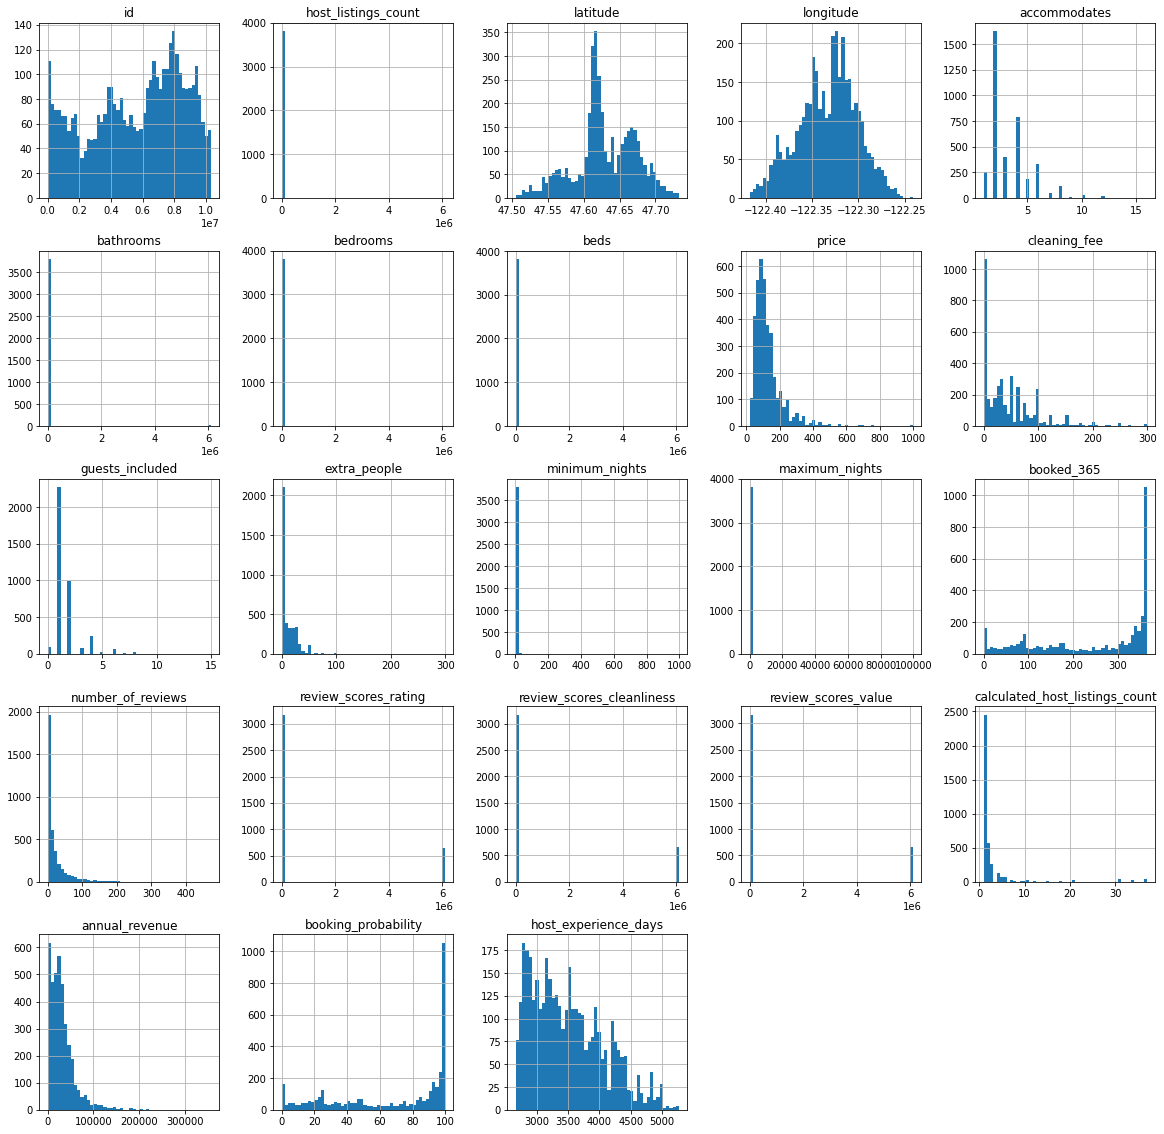

In [50]:
# histograms of the numerical value showing the frequency distribution in each numerical attribute.
airbnb_df1.hist(bins =50, figsize = (20, 20))
plt.show()

In [51]:
#correlation of the numerical features
corr = airbnb_df1.corr()
corr

,id,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,booked_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_value,calculated_host_listings_count,annual_revenue,booking_probability,host_experience_days
id,1.000000,0.028935,-0.016143,0.013360,-0.074279,-0.114455,-0.057432,-0.026998,-0.046289,-0.122722,-0.103058,-0.084815,-0.021601,0.101529,-0.159447,-0.506105,0.397856,0.399569,0.401866,-0.051348,-0.116854,-0.159447,-0.522627
host_listings_count,0.028935,1.000000,-0.006715,-0.010206,-0.015600,-0.001484,-0.000898,-0.000371,0.011822,-0.014895,-0.011759,0.002373,-0.001220,-0.002871,-0.035883,-0.013499,0.050686,0.050405,0.050265,-0.007516,-0.020357,-0.035883,0.000807
latitude,-0.016143,-0.006715,1.000000,-0.155092,0.000335,0.029397,-0.019875,0.026190,-0.008904,0.003279,0.034452,0.002132,-0.001222,-0.004705,0.000565,-0.032761,0.014222,0.017132,0.018842,0.026750,-0.016329,0.000565,0.007716
longitude,0.013360,-0.010206,-0.155092,1.000000,-0.071584,0.004462,-0.007872,-0.015472,-0.102420,-0.078980,-0.023828,0.005851,0.003406,-0.010435,-0.007926,-0.008260,-0.016267,-0.014983,-0.014620,0.086343,-0.087764,-0.007926,-0.017437
accommodates,-0.074279,-0.015600,0.000335,-0.071584,1.000000,-0.005311,-0.007008,0.005336,0.652218,0.630588,0.532796,0.148390,0.017097,0.003291,-0.031535,-0.072978,-0.039213,-0.041214,-0.040805,-0.029525,0.472711,-0.031535,0.108575
bathrooms,-0.114455,-0.001484,0.029397,0.004462,-0.005311,1.000000,-0.002574,0.249508,-0.007081,0.000569,-0.020913,-0.016298,-0.001967,-0.009016,0.028360,0.027236,0.013927,0.013605,0.013445,0.010225,0.008648,0.028360,0.106702
bedrooms,-0.057432,-0.000898,-0.019875,-0.007872,-0.007008,-0.002574,1.000000,-0.000642,-0.006362,-0.011442,-0.010266,-0.014668,-0.002521,-0.008786,0.027875,0.027457,-0.017921,-0.018021,-0.018070,-0.000761,0.009807,0.027875,0.070332
beds,-0.026998,-0.000371,0.026190,-0.015472,0.005336,0.249508,-0.000642,1.000000,0.027275,-0.014608,-0.008300,-0.009818,-0.001359,0.003313,0.015352,-0.009536,0.035833,0.035634,0.035536,-0.002599,0.038836,0.015352,0.012042
price,-0.046289,0.011822,-0.008904,-0.102420,0.652218,-0.007081,-0.006362,0.027275,1.000000,0.576423,0.392875,0.127961,0.017297,-0.003336,-0.015550,-0.124695,0.028792,0.027292,0.025704,-0.054092,0.743336,-0.015550,0.055510
cleaning_fee,-0.122722,-0.014895,0.003279,-0.078980,0.630588,0.000569,-0.011442,-0.014608,0.576423,1.000000,0.364955,0.153143,0.030623,-0.005981,0.053624,-0.122001,-0.057434,-0.059668,-0.060049,0.160882,0.488512,0.053624,0.172685


<AxesSubplot:>

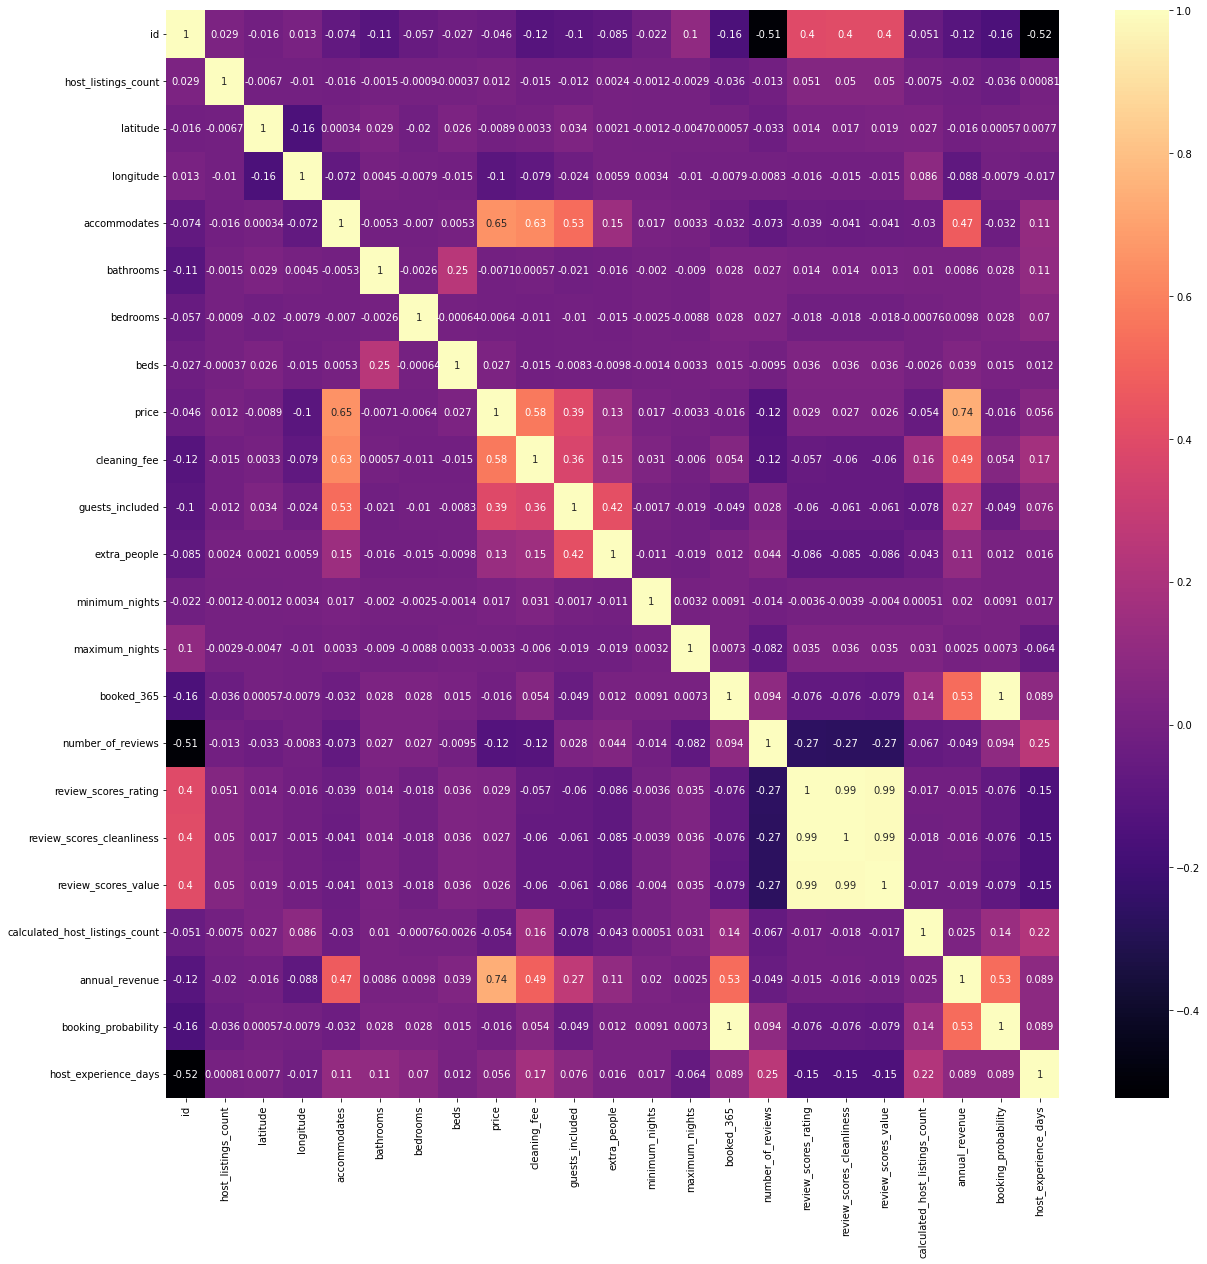

In [52]:
#heatmap of the correlation of numerical values
plt.figure(figsize = (20, 20))
sns.heatmap(data = corr, annot = True, cmap = "magma")

In [53]:
#find out how each numerical variable correlates with price.
#bedroom, bathroom, maximum nights have very little correlation with price.
corr["price"].sort_values(ascending = False)


price                             1.000000
annual_revenue                    0.743336
accommodates                      0.652218
cleaning_fee                      0.576423
guests_included                   0.392875
extra_people                      0.127961
host_experience_days              0.055510
review_scores_rating              0.028792
review_scores_cleanliness         0.027292
beds                              0.027275
review_scores_value               0.025704
minimum_nights                    0.017297
host_listings_count               0.011822
maximum_nights                   -0.003336
bedrooms                         -0.006362
bathrooms                        -0.007081
latitude                         -0.008904
booking_probability              -0.015550
booked_365                       -0.015550
id                               -0.046289
calculated_host_listings_count   -0.054092
longitude                        -0.102420
number_of_reviews                -0.124695
Name: price

# Analysing features that may affect price and revenue

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

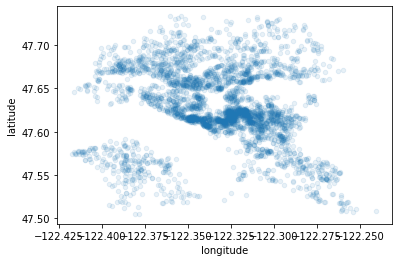

In [54]:
#shows geographical location with high and low density of airbnb accomodation.
airbnb_df1.plot(kind ="scatter", x = "longitude", y = "latitude", alpha  = 0.1)

In [55]:
#Check the different types of property. house and appartment form 90% of the property type
airbnb_df1["property_type"].value_counts(normalize = True)


House              0.454164
Apartment          0.447355
Townhouse          0.030906
Condominium        0.023834
Loft               0.010477
Bed & Breakfast    0.009691
Other              0.005762
Cabin              0.005500
Camper/RV          0.003405
Bungalow           0.003405
Boat               0.002095
Tent               0.001310
Treehouse          0.000786
Dorm               0.000524
Chalet             0.000524
Yurt               0.000262
Name: property_type, dtype: float64

In [56]:
#plot the average price for each property type
#sns.barplot(x= "price", y = "property_type", data = airbnb_df1).set(title = "Average price for each property type")

Comparing the Median and mean prices for each property type 

In [57]:
#split the property_type columns into groups of the different property type
property_group = airbnb_df1.groupby(["property_type"])
#check mean and median price for each property_type
property_group["price"].agg(["median", "mean", "max", "min", 'count']).sort_values(by = "median", ascending = False)



,median,mean,max,min,count
property_type,,,,,
Boat,150.0,282.375000,775.0,75.0,8
Condominium,115.0,151.109890,700.0,50.0,91
Apartment,110.0,122.932670,999.0,20.0,1708
Loft,102.5,135.700000,425.0,25.0,40
Yurt,100.0,100.000000,100.0,100.0,1
Bed & Breakfast,99.0,112.054054,299.0,30.0,37
Chalet,98.5,98.500000,135.0,62.0,2
Townhouse,97.0,129.457627,498.0,28.0,118
Bungalow,95.0,115.615385,349.0,65.0,13


Text(0.5, 0.98, 'price for each  property-type')

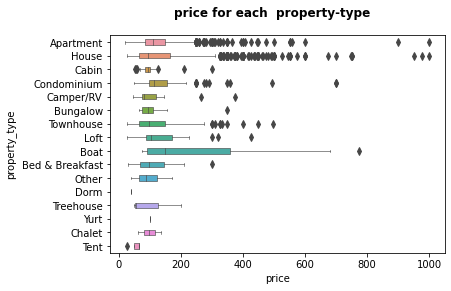

In [58]:
%matplotlib inline
sns.boxplot(data = airbnb_df1,  x= 'price', y =  'property_type',  linewidth=0.6, width=0.4)
#plt.title("proberty_type", fontsize=18, fontweight="bold")
plt.suptitle("price for each  property-type", fontweight="bold", fontsize=12)


Comparing the price for each property type versus the annual revenue

C:\Users\naddy\anaconda\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


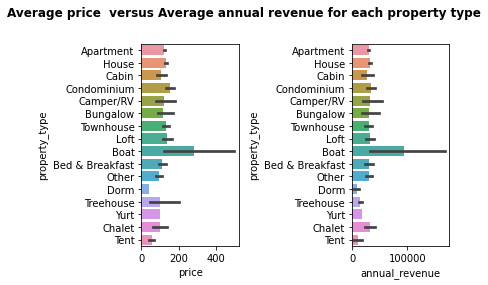

In [59]:
%matplotlib inline
#figure
fig, ax = plt.subplots(1, 2)
#plot the average price for each property type
sns.barplot(x= "price", y = "property_type", data = airbnb_df1, ax=ax[0])

#plot the average average property type for each property type
figsize =(20, 10)
sns.barplot(x= "annual_revenue", y = "property_type", data = airbnb_df1, ax=ax[1])
fig.tight_layout(h_pad =2)
fig.suptitle("Average price  versus Average annual revenue for each property type", fontweight="bold", fontsize=12)
plt.subplots_adjust(top =0.85)
fig.show()



In [60]:
#check the average anual revenue for each property type. calcuting both mean and median. Due to outliers seen in the price
property_group["annual_revenue"].agg(["median"]).sort_values(by = "median", ascending = False)

,median
property_type,
Boat,54750.0
Chalet,31632.5
Other,29316.0
Camper/RV,27375.0
Cabin,27200.0
Bungalow,27000.0
Apartment,26962.5
Loft,26020.0
House,23930.5


In [61]:
#Check the different types of room. Entire home/appartment has 67%  and private romm  has 30% of the property type
airbnb_df1["room_type"].value_counts(normalize = True)


Entire home/apt    0.665532
Private room       0.303824
Shared room        0.030644
Name: room_type, dtype: float64

In [62]:
#split the room_type column into groups of the different room type
room_group = airbnb_df1.groupby(["room_type"])
#check mean and median price for each property_type
room_group["price", "annual_revenue"].median().sort_values(by = "price", ascending = False)

C:\Users\naddy\anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,price,annual_revenue
room_type,,
Entire home/apt,126.0,31410.0
Private room,69.0,19642.5
Shared room,40.0,14560.0


C:\Users\naddy\anaconda\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


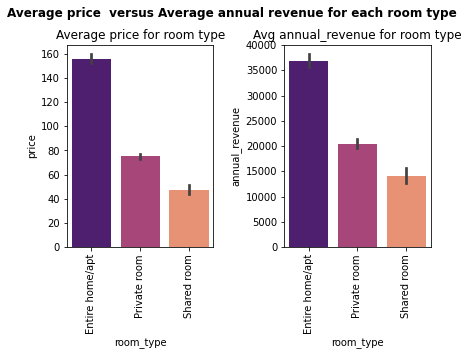

In [63]:
 #Number of listings for each room type
#
fig, ax = plt.subplots(1, 2)
#plot the average price for each property type
sns.barplot(x = "room_type", y = "price", data = airbnb_df1, palette = "magma", ax =ax[0]).set(title = "Average price for room type")
sns.barplot(x = "room_type", y = "annual_revenue", data = airbnb_df1, palette = "magma", ax =ax[1]).set(title = "Avg annual_revenue for room type")
#plot the average average property type for each property type
figsize =(20, 10)

fig.tight_layout()
#plt.xticks(rotation =90)
ax[0].tick_params(axis ='x', labelrotation =90)
ax[1].tick_params(axis ='x', labelrotation =90)
fig.suptitle("Average price  versus Average annual revenue for each room type", fontweight="bold", fontsize=12)
plt.subplots_adjust(top =0.85)
fig.show()

Average price and count for each unique  property and room type combined an

In [64]:
#group the data by property_type and room_type and calculate the median and number of listing in each groupthe 
property_room_group = airbnb_df1.groupby(["property_type", "room_type"])
property_room_group["price"].agg(["median", "count"]).sort_values(by = "median", ascending = False)

,,median,count
property_type,room_type,,
Boat,Entire home/apt,464.5,4
Treehouse,Entire home/apt,200.0,1
Townhouse,Entire home/apt,160.0,54
House,Entire home/apt,156.0,895
Condominium,Entire home/apt,135.0,72
Chalet,Entire home/apt,135.0,1
Boat,Private room,122.5,4
Other,Entire home/apt,120.5,12
Apartment,Entire home/apt,119.0,1428


 Annual booking probability for each property and room type combination


In [65]:
property_room_group["booking_probability"].mean().sort_values(ascending = False)

property_type    room_type      
Camper/RV        Shared room        100.000000
Chalet           Private room       100.000000
Other            Shared room         98.082192
Bed & Breakfast  Shared room         97.808219
House            Shared room         96.642590
Loft             Shared room         94.520548
Other            Entire home/apt     88.904110
Condominium      Shared room         84.657534
Treehouse        Private room        83.835616
Chalet           Entire home/apt     82.465753
Loft             Private room        81.765601
Other            Private room        80.205479
Boat             Entire home/apt     78.630137
                 Private room        77.191781
Camper/RV        Entire home/apt     75.616438
House            Private room        73.492801
Bungalow         Entire home/apt     73.127854
Bed & Breakfast  Private room        72.777086
Condominium      Private room        70.928463
Townhouse        Private room        69.633230
Apartment        Private ro

Average price and avg annual revenue for each property and room type combination

In [66]:
property_room_group["price", "annual_revenue"].median().sort_values(by ="price", ascending = False)

C:\Users\naddy\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,,price,annual_revenue
property_type,room_type,,
Boat,Entire home/apt,464.5,157982.5
Treehouse,Entire home/apt,200.0,12200.0
Townhouse,Entire home/apt,160.0,29570.0
House,Entire home/apt,156.0,35145.0
Condominium,Entire home/apt,135.0,31360.0
Chalet,Entire home/apt,135.0,40635.0
Boat,Private room,122.5,44712.5
Other,Entire home/apt,120.5,42655.0
Apartment,Entire home/apt,119.0,29535.0


Analyse neighbourhood with the highest revenue

In [67]:
#grouping neighbouhood  by their ,"property_type", "room_type"
neighbours_group = airbnb_df1.groupby(["neighbourhood_cleansed",  "room_type"])
neighbours_group["price"].agg(["median", "count"]).sort_values(by = "median", ascending = False)

,,median,count
neighbourhood_cleansed,room_type,,
Sunset Hill,Entire home/apt,350.0,8
Industrial District,Entire home/apt,265.0,3
Southeast Magnolia,Entire home/apt,225.0,13
Holly Park,Entire home/apt,215.0,3
Arbor Heights,Entire home/apt,200.0,3
...,...,...,...
Stevens,Shared room,30.0,16
Lawton Park,Shared room,30.0,1
Genesee,Shared room,30.0,1


In [68]:
(airbnb_df1["neighbourhood_cleansed"].value_counts(normalize = True)).head(20)


Broadway                     0.103981
Belltown                     0.061289
Wallingford                  0.043740
Fremont                      0.041383
Minor                        0.035359
University District          0.031954
Stevens                      0.031168
First Hill                   0.028287
Central Business District    0.026977
Lower Queen Anne             0.024620
Greenwood                    0.023311
East Queen Anne              0.021477
North Beacon Hill            0.020430
Phinney Ridge                0.019120
Adams                        0.018334
Ravenna                      0.017548
Mann                         0.017548
West Queen Anne              0.017025
West Woodland                0.016763
Columbia City                0.015191
Name: neighbourhood_cleansed, dtype: float64

In [69]:
#the median airbnb price and anual revenue for each group of neighbourhood /property/room_type
neighbourhood_room_group = airbnb_df1.groupby(["neighbourhood_cleansed", "property_type", "room_type"])
(neighbourhood_room_group[["price", "annual_revenue"]].median().sort_values(by = "annual_revenue", ascending = False)).head(50)




,,,price,annual_revenue
neighbourhood_cleansed,property_type,room_type,,
Wallingford,Boat,Entire home/apt,680.0,225080.0
Westlake,Boat,Entire home/apt,512.0,186105.0
Holly Park,Camper/RV,Entire home/apt,375.0,136875.0
Industrial District,Loft,Entire home/apt,320.0,116800.0
High Point,Apartment,Private room,300.0,109500.0
Pioneer Square,Loft,Entire home/apt,300.0,105600.0
North Admiral,Condominium,Entire home/apt,297.0,105336.0
Lawton Park,Condominium,Entire home/apt,280.0,102200.0
Portage Bay,House,Entire home/apt,380.0,93805.0


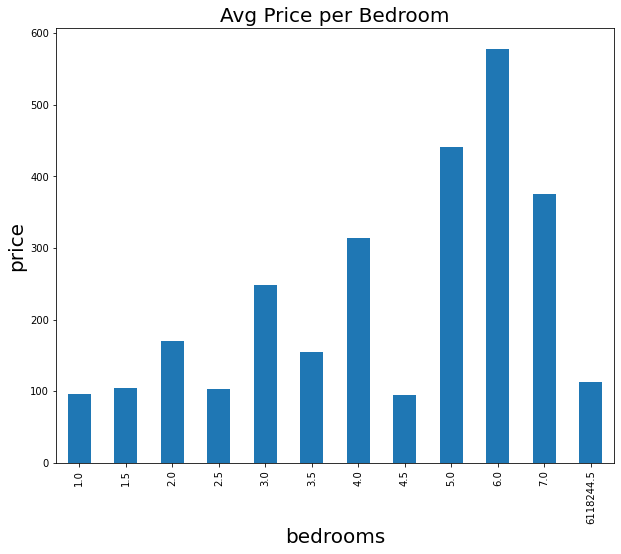

In [70]:
plt.figure(figsize=(10,8))
airbnb_df1.groupby('bedrooms').mean()['price'].plot(kind='bar')
plt.title("Avg Price per Bedroom", size=20)
plt.xlabel("bedrooms", size=20)
plt.ylabel('price', size=20)
plt.show()

In [71]:
#real beds are prefered and used more than the other types of beds
airbnb_df1["bed_type"].value_counts(normalize = True)

Real Bed         0.957831
Futon            0.019382
Pull-out Sofa    0.012310
Airbed           0.007072
Couch            0.003405
Name: bed_type, dtype: float64

In [72]:
#check the average price, annual revenue and booking_probability for each bed type
bed_type_group = airbnb_df1.groupby(["bed_type"])
bed_type_group["price", "annual_revenue", "booking_probability"].mean().sort_values(by = "price", ascending = False)

C:\Users\naddy\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,price,annual_revenue,booking_probability
bed_type,,,
Real Bed,130.368882,31689.513536,67.011661
Pull-out Sofa,77.276596,22360.000000,75.021860
Airbed,73.962963,18605.000000,60.933536
Futon,72.824324,17594.608108,68.045168
Couch,64.307692,13554.769231,59.283456


In [73]:
#effect of the cancellation_policy on price
airbnb_df1["cancellation_policy"].value_counts(normalize = True)

strict      0.371137
moderate    0.327658
flexible    0.301205
Name: cancellation_policy, dtype: float64

In [74]:
cancel_policy_group = airbnb_df1.groupby(["cancellation_policy"])
cancel_policy_group ["price", "annual_revenue", "booking_probability"].mean().sort_values(by = "price", ascending = False)

C:\Users\naddy\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,price,annual_revenue,booking_probability
cancellation_policy,,,
strict,154.597036,38843.792519,69.489661
moderate,114.775380,27001.953637,65.660348
flexible,109.534783,26172.974783,65.592138


[Text(0.5, 1.0, 'price and cancellation_policy relation')]

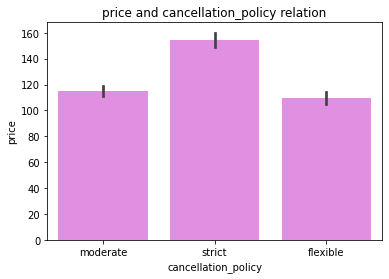

In [75]:
figsize = (10,8)
sns.barplot(x="cancellation_policy",
            y= "price", 
            data = airbnb_df1,
            color = "violet" ).set(title = "price and cancellation_policy relation")

In [76]:
#analyse the effect of accomdate and guest_included on price. guests_included will be deleted since 
#accommodates has more influence on pricing per customer.lik 

airbnb_df1[["accommodates", "guests_included"]]

,accommodates,guests_included
0,4,2
1,4,1
2,11,10
3,3,1
4,6,6
...,...,...
3813,6,1
3814,4,3
3815,2,2
3816,2,1


In [77]:
# drop guest_included since it seems to reperent the number of guest a property can accommodate 
#though the values are mostly different
airbnb_df1.drop(["guests_included"], axis = 1, inplace= True)

[Text(0.5, 1.0, 'Avg price for the number of persons a  property accommodates')]

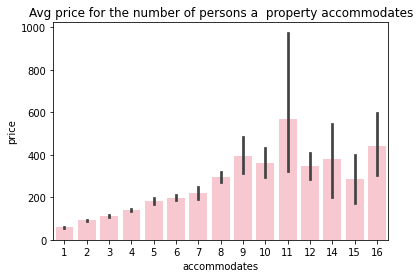

In [78]:
#plot of the average price for the number of person a property accomodates
figsize = (10,8)
sns.barplot(x="accommodates",
            y= "price", 
            data = airbnb_df1,
            color = "pink" ).set(title = "Avg price for the number of persons a  property accommodates")

#As the number of persons a property can accomdate increases the price until it reaches a point of deminishing return.

In [79]:
#check ammenities provided by the listings
airbnb_df1["amenities"].head(10)

0    {TV,"Cable TV",Internet,"Wireless Internet","A...
1    {TV,Internet,"Wireless Internet",Kitchen,"Free...
2    {TV,"Cable TV",Internet,"Wireless Internet","A...
3    {Internet,"Wireless Internet",Kitchen,"Indoor ...
4    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
5    {"Wireless Internet","Free Parking on Premises...
6    {"Wireless Internet","Free Parking on Premises...
7    {"Wireless Internet","Pets live on this proper...
8    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
9    {TV,Internet,"Wireless Internet",Kitchen,"Free...
Name: amenities, dtype: object

In [80]:
#creating new columns and adding to the dataframe representing some of the ammenities. 1 if available and 0 if not.
get_amenities={"contains_tv": "tv",
                 "Pets Allowed": "Pets Allowed",
                  "contains_internet": "internet",
                  "includes_breakfast": "Breakfast",
                   "contains_air_condition": "Air Conditioning",
                  "contains_free_parking": "free parking", 
                  "contains_kitchen" : "kitchen", 
                  "24-Hour_Check-in" : "24-Hour Check-in",
                   "Family_Kid_Friendly": "Family/Kid Friendly",
                  "contains_pool" : "pool",
                   "suitable_for_events":"Suitable for Events" }
for k,v in get_amenities.items():
    airbnb_df1[k] = airbnb_df1["amenities"].apply(lambda x: 1 if v in x.lower() else 0 )


In [81]:
#Check the correlation for the created amenities columns including the price and revenue columns
amen_cols =airbnb_df1[["price", "annual_revenue", "contains_tv", "Pets Allowed", "contains_internet", "includes_breakfast",
                     "contains_air_condition", "contains_free_parking",  "contains_kitchen", "24-Hour_Check-in" ,
                       "Family_Kid_Friendly", "contains_pool", "suitable_for_events"]]


In [82]:
#check correlation of price and annual revenue with the newly added amenities columns
corr = amen_cols.corr()
corr

,price,annual_revenue,contains_tv,Pets Allowed,contains_internet,includes_breakfast,contains_air_condition,contains_free_parking,contains_kitchen,24-Hour_Check-in,Family_Kid_Friendly,contains_pool,suitable_for_events
price,1.000000,0.743336,0.222488,NaN,0.023868,NaN,NaN,0.079408,0.125024,NaN,NaN,0.099141,NaN
annual_revenue,0.743336,1.000000,0.165726,NaN,0.003124,NaN,NaN,0.058165,0.066816,NaN,NaN,0.109417,NaN
contains_tv,0.222488,0.165726,1.000000,NaN,0.190457,NaN,NaN,0.102536,0.190295,NaN,NaN,0.104448,NaN
Pets Allowed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contains_internet,0.023868,0.003124,0.190457,NaN,1.000000,NaN,NaN,0.113983,0.202022,NaN,NaN,0.009154,NaN
includes_breakfast,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contains_air_condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contains_free_parking,0.079408,0.058165,0.102536,NaN,0.113983,NaN,NaN,1.000000,0.043731,NaN,NaN,0.039049,NaN
contains_kitchen,0.125024,0.066816,0.190295,NaN,0.202022,NaN,NaN,0.043731,1.000000,NaN,NaN,0.062203,NaN
24-Hour_Check-in,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
#drop all ammenities columns with NAN values
airbnb_df1.drop(["Pets Allowed", "includes_breakfast", "contains_air_condition", "24-Hour_Check-in", 
                 "Family_Kid_Friendly", "suitable_for_events"], axis=1, inplace = True)

In [84]:
#the remaining columns seem to have a positive correlation with price column.
amen_cols =airbnb_df1[["price", "annual_revenue", "contains_tv", "contains_internet",
                  "contains_free_parking",  "contains_kitchen", "contains_pool"]]
corr = amen_cols.corr()
corr

,price,annual_revenue,contains_tv,contains_internet,contains_free_parking,contains_kitchen,contains_pool
price,1.000000,0.743336,0.222488,0.023868,0.079408,0.125024,0.099141
annual_revenue,0.743336,1.000000,0.165726,0.003124,0.058165,0.066816,0.109417
contains_tv,0.222488,0.165726,1.000000,0.190457,0.102536,0.190295,0.104448
contains_internet,0.023868,0.003124,0.190457,1.000000,0.113983,0.202022,0.009154
contains_free_parking,0.079408,0.058165,0.102536,0.113983,1.000000,0.043731,0.039049
contains_kitchen,0.125024,0.066816,0.190295,0.202022,0.043731,1.000000,0.062203
contains_pool,0.099141,0.109417,0.104448,0.009154,0.039049,0.062203,1.000000


In [85]:
airbnb_df1.drop("amenities",axis=1,inplace=True)

In [86]:
#airbnb_df1.plot.scatter(x="review_scores_value", y="price", figsize=(15,8), c='dimgrey')
#plt.title('Relation between Number of Reviews & Price\n', fontsize=14, fontweight='bold');

Analysing  categorical columns with descriptive text

(-0.5, 399.5, 199.5, -0.5)

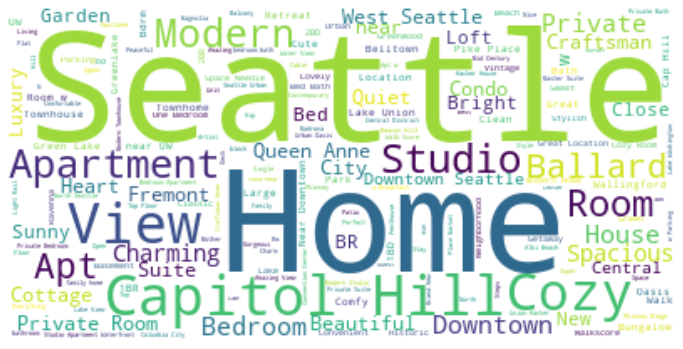

In [87]:
#check what descriptive names are frequently used (name column)
%matplotlib inline
text = " ".join(i for i in airbnb_df1.name)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords =stopwords, background_color = "white").generate(text)
plt.figure(figsize =( 12, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")


(-0.5, 399.5, 199.5, -0.5)

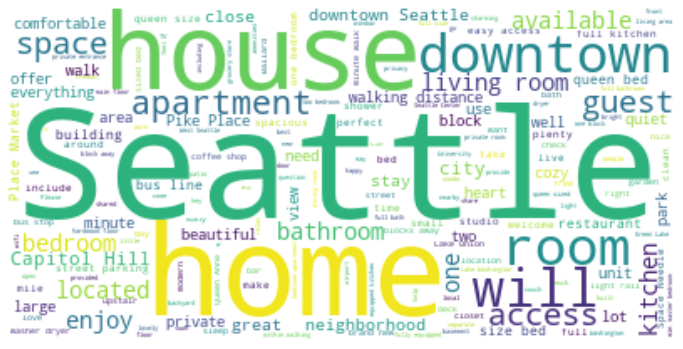

In [88]:
# Analysing the description column
texts = " ".join(i for i in airbnb_df1.description)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords =stopwords, background_color = "white").generate(texts)
plt.figure(figsize =( 12, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

In [89]:
# checking if a host being a super_host comes with the experience
pd.crosstab(airbnb_df1.host_is_superhost, airbnb_df1.host_experience_days)

host_experience_days,2663,2664,2665,2667,2668,2669,2670,2675,2676,2677,2680,2682,2683,2684,2686,2687,2688,2689,2690,2692,2693,2694,2697,2698,2699,2700,2702,2703,2704,2705,2706,2707,2708,2709,2710,2711,2712,2713,2714,2715,2716,2717,2718,2719,2720,2721,...,4674,4685,4717,4730,4746,4748,4749,4755,4756,4763,4765,4780,4787,4789,4796,4797,4807,4817,4830,4832,4850,4851,4860,4866,4867,4876,4890,4908,4916,4930,4939,4961,4977,4980,4987,4997,5000,5001,5062,5072,5106,5133,5160,5175,5214,5273
host_is_superhost,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
f,2,2,1,1,1,1,1,1,2,1,1,2,2,1,1,1,4,2,1,5,6,1,5,2,1,1,2,3,1,1,1,1,1,4,4,3,1,1,2,2,3,1,3,2,5,2,...,1,1,2,1,0,1,2,2,2,2,0,1,1,1,2,1,1,0,33,2,1,2,3,1,1,4,2,0,10,1,1,3,5,1,5,0,0,5,2,1,3,1,1,2,0,4
t,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,6,2,1,0,0,0,0,0,0,1,0


[Text(0.5, 1.0, 'Relationship between price and the super host status')]

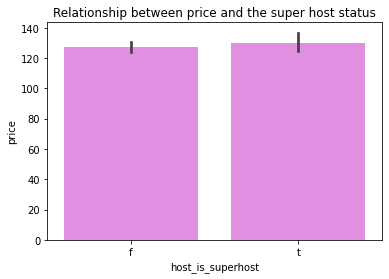

In [90]:
#checking the pricing of superhost listings 
figsize = (10,8)
sns.barplot(x="host_is_superhost",
            y= "price", 
            data = airbnb_df1,
            color = "violet" ).set(title = "Relationship between price and the super host status")

#superhost have  just a slightly higher price

[Text(0.5, 1.0, 'pricing and cleaning fee relationship')]

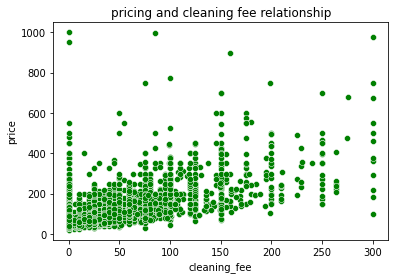

In [91]:
#checking the effect of charging for cleaning fee on pricing 
figsize = (10,8)
sns.scatterplot(x="cleaning_fee",
            y= "price", 
            data = airbnb_df1,
            color = "green" ).set(title = "pricing and cleaning fee relationship")
#cheaper listing seem to charge for cleaning services.

[Text(0.5, 1.0, 'price and extra_people relationship')]

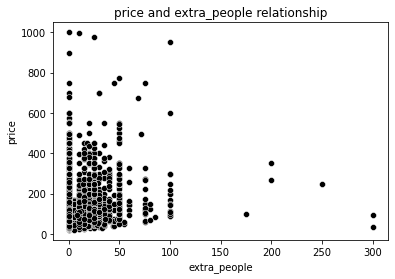

In [92]:
#checking if the fee paid for having extra people does have impact on the price
#pylab.rcParams['xtick.major.pad'] = '8'
#pylab.rcParams['xtick.major.pad'] = '8'
figsize = (20,10)
ax = sns.scatterplot(x= "extra_people", 
            y= "price",   
            data = airbnb_df1,
            color = "black" )
ax.set(title = "price and extra_people relationship")
#ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

# Part Two: Price prediction using machine learning models

In [119]:
# copy the the original unprocessed  data into a new variable
airbnb_df3 = airbnb_df.copy()

In [120]:
#convert this new price to float and remove dollar sign using the already created function
airbnb_df3["price"]=airbnb_df3["price"].apply(lambda x: delete_dollar_sign(x))
airbnb_df3["price"]

0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64

In [121]:
#remove dollar sign and convert to float from the new copy of the data
airbnb_df3["cleaning_fee"] = airbnb_df3["cleaning_fee"].apply(lambda x: delete_dollar_sign(x))
airbnb_df3["cleaning_fee"]

0         NaN
1        40.0
2       300.0
3         NaN
4       125.0
        ...  
3813    230.0
3814     50.0
3815     35.0
3816     45.0
3817      NaN
Name: cleaning_fee, Length: 3818, dtype: float64

In [122]:
#Fill in NaN values with zero 
airbnb_df3["cleaning_fee"].fillna(0, inplace=True)
airbnb_df3["cleaning_fee"].isnull().sum()

0

In [123]:
#remove dollar sign and convert to float from the new copy of the data
airbnb_df3["extra_people"] = airbnb_df3["extra_people"].apply(lambda x: delete_dollar_sign(x))
airbnb_df3["extra_people"] 

0        5.0
1        0.0
2       25.0
3        0.0
4       15.0
        ... 
3813     0.0
3814    25.0
3815    20.0
3816     0.0
3817     0.0
Name: extra_people, Length: 3818, dtype: float64

In [124]:
#check miising values
airbnb_df3["extra_people"].isnull().sum()

0

In [125]:
#airbnb_df3["minimum_nights"].unique()

In [126]:
airbnb_df3["price"]

0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64

In [127]:
#create new columns from the amenities column and add to the dataframe representing some of the ammenities.
#1 if available and 0 if not.
get_amenity ={"contains_tv": "tv",
              "contains_internet": "internet",
              "contains_free_parking": "free parking", 
              "contains_kitchen" : "kitchen", 
              "contains_pool" : "pool"}
for k, v in get_amenity.items():
    airbnb_df3[k] = airbnb_df3["amenities"].apply(lambda x: 1 if v in x.lower() else 0 )
    
   

In [128]:
#copy the booking_probabilty column in airbnb_df1  in to airbnb_df3
airbnb_df3['booking_probability'] = airbnb_df1['booking_probability']

In [129]:
#copy the host_experience_days column in airbnb_df1  in to airbnb_df3
airbnb_df3['host_experience_days'] = airbnb_df1['host_experience_days']

In [130]:
#copy the booking_365 column in airbnb_df1  in to airbnb_df3
airbnb_df3['booked_365'] = airbnb_df1['booked_365']

In [131]:
airbnb_df3.dtypes

id                        int64
listing_url              object
scrape_id                 int64
last_scraped             object
name                     object
                         ...   
contains_kitchen          int64
contains_pool             int64
booking_probability     float64
host_experience_days      int32
booked_365                int64
Length: 100, dtype: object

From the data exploration, some attributes were discovered to be more relevant than others. So the less relevant ones will be 
dropped before the model training and testing

# Handle missing values in the newly copied data


In [132]:
#drop these columns from the dataset
airbnb_df3.drop(["host_since","experiences_offered", 'host_response_time', 'host_response_rate', "space", 'host_has_profile_pic', 'host_acceptance_rate',
                'number_of_reviews','space','neighborhood_overview', 'notes', 'availability_365',
                 "host_about", "host_acceptance_rate", 'host_neighbourhood', "country_code", "country", "city", 
                 "state", "host_verifications", "host_location","smart_location", "summary", "id", "smart_location",
                "jurisdiction_names", "market", "requires_license", "calendar_last_scraped", "host_name",
                 "host_id","host_picture_url", "street", "description", "calendar_updated", 
                     "scrape_id", "host_url", "last_scraped",  "host_thumbnail_url", "host_listings_count", "neighbourhood",
                 "amenities", "monthly_price", "guests_included", "maximum_nights", "license","security_deposit", 
                 "square_feet", "listing_url", 'neighbourhood_group_cleansed', 
                    "picture_url", "availability_30","availability_60", "has_availability", "availability_90", 'xl_picture_url', "weekly_price",
               "host_total_listings_count",'thumbnail_url', 'medium_url', 'xl_picture_url', 'review_scores_accuracy',
                 'review_scores_location', 'review_scores_checkin','review_scores_accuracy','reviews_per_month', 
                 'first_review', 'last_review','review_scores_communication'], axis =1, inplace=True)

In [161]:
# Seperate the remaining columns in to 2 groups. categorical and numerical data
numerical_col = ['contains_internet', 'contains_kitchen' ,'minimum_nights', 'host_experience_days',
                 'contains_pool', 'cleaning_fee', "contains_tv", "calculated_host_listings_count", 'booking_probability',
                  "review_scores_value", "review_scores_rating", 'bathrooms', "review_scores_cleanliness", "beds", 'booked_365',
                 "accommodates", "bedrooms", "longitude", "latitude",  'extra_people']                                
categorical_col = ['host_is_superhost','require_guest_profile_picture', 'host_identity_verified', "zipcode",
                   'neighbourhood_cleansed', 'is_location_exact', 'property_type', 'room_type', 'instant_bookable', 
                   'cancellation_policy', 'require_guest_phone_verification', 'bed_type', 'transit', "name", 'contains_free_parking'] 



In [162]:
#assign the response variable before any further processing with the rest of the data
y_price = airbnb_df3["price"]
x_pred = airbnb_df3.drop(["price"], axis =1)

In [163]:
#split the response variable and the transformed predictors in to training and testing parts
#np.random.seed(40)
x_pred_train, x_pred_test, y_price_train, y_price_test = train_test_split(x_pred, y_price, test_size = 0.3, random_state =40)


In [164]:
x_pred_train.shape , x_pred_test.shape, y_price_train.shape, y_price_test.shape 

((2672, 35), (1146, 35), (2672,), (1146,))

In [165]:
#handling the missing values
numeric_transformer = Pipeline(steps=[
   ('imputer', SimpleImputer(strategy='median', missing_values = np.nan)),     
   ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
   ('imputer', SimpleImputer(strategy='most_frequent', missing_values =np.nan))]) #,('onehot', OneHotEncoder(sparse = False))])

In [166]:
imputer = ColumnTransformer(
   remainder = 'passthrough',
   transformers=[
       ('numerical', numeric_transformer, numerical_col),
       ('categorical', categorical_transformer, categorical_col)])
#transform the testing and training predictors seperately to avoid data leakage
fill_x_train = imputer.fit_transform(x_pred_train)
fill_x_test = imputer.transform(x_pred_test)

In [167]:
#The transformed attributes in the training set are converted to a data frame 
x_pred_train_preped = pd.DataFrame(fill_x_train, columns = ['transit', 'host_is_superhost',
       'host_identity_verified', 'neighbourhood_cleansed', 'host_experience_days', 
        'booking_probability', 'booked_365', "zipcode", "name",
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'cleaning_fee', 'extra_people', 'minimum_nights',
        'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count', 'contains_tv', 'contains_internet',
       'contains_free_parking', 'contains_kitchen', 'contains_pool'])
x_pred_train_preped.shape 

(2672, 35)

In [168]:
#The transformed predictor attributes in the testing set are converted to a data frame
x_pred_test_preped = pd.DataFrame(fill_x_test, columns = ['transit', 'host_is_superhost',
       'host_identity_verified', 'neighbourhood_cleansed', 'host_experience_days', 
        'booking_probability', 'booked_365', "zipcode", "name",
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'cleaning_fee', 'extra_people', 'minimum_nights',
        'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count', 'contains_tv', 'contains_internet',
       'contains_free_parking', 'contains_kitchen', 'contains_pool'])

In [169]:
#x_pred_test_preped, x_pred_train_preped, 

In [170]:
#encode categories in to numbers in both the  prepared x training and testing set 
one_hot= OneHotEncoder(handle_unknown = 'ignore', sparse = False)
transformer = ColumnTransformer([('one_hot', one_hot, categorical_col,)],  remainder = 'passthrough')
x_pred_trainer = transformer.fit_transform(x_pred_train_preped[categorical_col])
x_pred_tester = transformer.transform(x_pred_test_preped[categorical_col])

# Model 1 : Random Forest Regression for price prediction

In [171]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
np.random.seed(50)

#train a baseline model with default parameters
rf_reg_model1 = RandomForestRegressor()
rf_reg_model1.fit(x_pred_trainer, y_price_train)



RandomForestRegressor()

In [188]:
rf_reg_model1.get_params()

In [172]:
#evaluate trained model on training set
rf_price_prediction_tr = rf_reg_model1.predict(x_pred_trainer)


In [173]:
#model evaluation function which prints out the the performance metric 
def model_eval(y_response, model_prediction):
    rf_mse_score = mean_squared_error(y_response, model_prediction)
    rf_rmse_score = np.sqrt(rf_mse_score)
    rf_r2_score= r2_score(y_response, model_prediction)
    rf_mae_score  = mean_absolute_error(y_response, model_prediction)
    #return rf_mse_score, rf_rmse_score, rf_r2_score, rf_mae_score
    print(" The MSE is = ", rf_mse_score)
    print(" The RMSE is = ", rf_rmse_score)
    print(" The R2 is = ", rf_r2_score)
    print("the MAE is = ", rf_mae_score)
    



Display the performance of the trained random forest model on the training set

In [174]:
#baseline rf model performance on the training set 
model_eval(y_price_train, rf_price_prediction_tr )

 The MSE is =  579.2807605164671
 The RMSE is =  24.068252128404904
 The R2 is =  0.9289077591330601
the MAE is =  13.241148952095807


Display the performance the trained random forest model on the testing set

In [175]:
#evaluate trained model on testing set
rf_price_prediction = rf_reg_model1.predict(x_pred_tester)
#baseline rf model performance on the testing set 
model_eval(y_price_test, rf_price_prediction )


 The MSE is =  4122.342822076788
 The RMSE is =  64.20547345886321
 The R2 is =  0.4929457432344191
the MAE is =  35.160636998254795


Hyperparameter search for the RF model using gridsearchcv

In [260]:
from sklearn.model_selection import GridSearchCV

p_grid = {"n_estimators": [80, 85, 90, 100, 110, 120],
               "max_features": ["sqrt", "log2"],
                 "max_depth": [4,6,8],
                'random_state' : [20]}
np.random.seed(50)

GridSearch_rf =GridSearchCV(estimator = RandomForestRegressor(),
                              param_grid = p_grid,
                            scoring = 'neg_mean_absolute_error',
                            cv= 10)
GridSearch_rf.fit(x_pred_trainer, y_price_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [80, 85, 90, 100, 110, 120],
                         'random_state': [20]},
             scoring='neg_mean_absolute_error')

In [261]:
#display best parameter
GridSearch_rf.best_params_


{'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 90,
 'random_state': 20}

In [270]:
#prints the result of the grid search. The best parameters and the MAE result as specified
cvresult = GridSearch_rf.cv_results_
for mean_score,params in zip(cvresult["mean_test_score"], cvresult["params"]):
      print(np.sqrt(-mean_score), params)

7.449235634277405 {'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 80, 'random_state': 20}
7.437644016405823 {'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 85, 'random_state': 20}
7.43326381133923 {'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 90, 'random_state': 20}
7.431925889892683 {'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 100, 'random_state': 20}
7.440038187283396 {'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 110, 'random_state': 20}
7.441350692596651 {'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 120, 'random_state': 20}
7.7115266115738965 {'max_depth': 4, 'max_features': 'log2', 'n_estimators': 80, 'random_state': 20}
7.713407865355719 {'max_depth': 4, 'max_features': 'log2', 'n_estimators': 85, 'random_state': 20}
7.713315019678672 {'max_depth': 4, 'max_features': 'log2', 'n_estimators': 90, 'random_state': 20}
7.701476524436784 {'max_depth': 4, 'max_features': 'log2', 'n_estimators': 100, 'random_state': 20}
7.7028

In [263]:
#train rf model using the best params result from the grid search
rf_reg_model_best = RandomForestRegressor(  n_estimators = 90,
                                             max_depth = 8,
                                           max_features = 'sqrt',
                                          random_state = 20)
rf_reg_model_best.fit(x_pred_trainer, y_price_train)


RandomForestRegressor(max_depth=8, max_features='sqrt', n_estimators=90,
                      random_state=20)

In [265]:
#evaluate trained model on testing set
rf_price_prediction_gs = rf_reg_model_best.predict(x_pred_tester)

model_eval(y_price_test, rf_price_prediction_gs)


 The MSE is =  6408.12250865617
 The RMSE is =  80.05074958210054
 The R2 is =  0.2117914651619145
the MAE is =  49.84389920666834


In [167]:
from sklearn.model_selection import cross_val_score
#k-fold cross validation , randomly splits the train set in to 10 folds. train on 9 set and evaluates
#on the 1 validation settest on
np.random.seed(50)
scores = cross_val_score(rf_reg_model_best, x_pred_trainer, y_price_train,
                         scoring="neg_mean_squared_error", cv=10)
rf_rmse_scores = np.sqrt(-scores)

In [168]:
rf_rmse_scores 


array([ 87.02238558,  74.83576773,  84.78877758,  63.53879934,
        74.85903235,  89.60039032, 106.15430597,  70.23436257,
        72.50707   ,  75.50758762])

In [170]:
#function to print scores from cv
def score_display_cv(model_scores):
    print("scores :", model_scores)
    print("mean:", model_scores.mean())
    print("standard deviation:", model_scores.std())


In [172]:
#resuklt of the model evaluation using train set
score_display_cv(-scores)


scores : [ 7572.89559141  5600.39213165  7189.1368028   4037.17902151
  5603.87472375  8028.22994541 11268.73667637  4932.86568576
  5257.27519966  5701.39578744]
mean: 6519.198156574948
standard deviationu: 1975.2096248684584


Text(0.5, 1.0, 'Random Forest Feature importance')

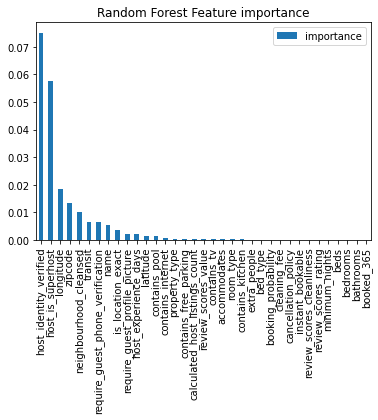

In [233]:
#feature importance for rf model
np.random.seed(50)
feat = {}
for feature, importance in zip(x_pred.columns, rf_reg_model_best.feature_importances_):
    feat[feature] = importance
importances = pd.DataFrame.from_dict(feat, orient= 'index').rename(columns={0: 'importance'})
importances.sort_values(by = 'importance', ascending = False).plot(kind='bar')
plt.title("Random Forest Feature importance")          

In [136]:
#getting the score for the importance of the different features.
importances.sort_values( by = ["importance"], ascending =False)

,importance
host_identity_verified,0.061200
host_is_superhost,0.056347
longitude,0.022462
zipcode,0.013820
neighbourhood_cleansed,0.007537
transit,0.006643
host_experience_days,0.004045
latitude,0.002834
require_guest_phone_verification,0.002810
name,0.002728


In [137]:
#train set result the model on the train set 
def score_display_cv(model_scores):
    print("scores :", model_scores)
    print("mean:", model_scores.mean())
    print("standard deviationu:", model_scores.std())

# Model 2: Linear SVR model 

In [190]:
#train svr model on train set

linear_SVR_model = LinearSVR()
linear_SVR_model.fit(x_pred_trainer, y_price_train)


LinearSVR()

In [191]:
linear_SVR_model.get_params()

{'C': 1.0,
 'dual': True,
 'epsilon': 0.0,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'loss': 'epsilon_insensitive',
 'max_iter': 1000,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [193]:
#evaluate trained model on training set
lsvr_price_prediction_tr = linear_SVR_model.predict(x_pred_trainer)

model_eval(y_price_train, lsvr_price_prediction_tr)

 The MSE is =  4502.760400506496
 The RMSE is =  67.10261098129115
 The R2 is =  0.4473986557510967
the MAE is =  34.614547223908225


In [194]:
#evaluate trained model on testing set
lsvr_price_prediction = linear_SVR_model.predict(x_pred_tester)
model_eval(y_price_test, lsvr_price_prediction)



 The MSE is =  4995.41122984409
 The RMSE is =  70.67822316558396
 The R2 is =  0.38555703935584784
the MAE is =  37.92021673693662


In [271]:
p_grid1 = {'C':[10, 20, 22],
            "epsilon": [ 0.2, 0.4, 0.6]}
np.random.seed(50)
lsvr = LinearSVR()
GridSearch_lsvr =GridSearchCV(estimator = lsvr,
                              param_grid = p_grid1,
                             scoring = 'neg_mean_absolute_error',
                             cv= 10)
                             
GridSearch_lsvr.fit(x_pred_trainer, y_price_train)
GridSearch_lsvr.best_params_

{'C': 10, 'epsilon': 0.6}

In [276]:
#prints the result of the grid search. The best parameters and the MAE result as specified
cvresult = GridSearch_lsvr.cv_results_
for mean_score,params in zip(cvresult["mean_test_score"], cvresult["params"]):
      print(np.sqrt(-mean_score), params)

6.108709997542563 {'C': 10, 'epsilon': 0.2}
6.1084531567303095 {'C': 10, 'epsilon': 0.4}
6.108262277708836 {'C': 10, 'epsilon': 0.6}
6.1598258733176126 {'C': 20, 'epsilon': 0.2}
6.159796478097853 {'C': 20, 'epsilon': 0.4}
6.159813512130733 {'C': 20, 'epsilon': 0.6}
6.170688414272952 {'C': 22, 'epsilon': 0.2}
6.1706686283337975 {'C': 22, 'epsilon': 0.4}
6.170701175071451 {'C': 22, 'epsilon': 0.6}


In [272]:
#train the svr with the best param from the grid search
linear_SVR_model_best = LinearSVR(C = 10, epsilon = 0.6)
linear_SVR_model_best.fit(x_pred_trainer, y_price_train)


LinearSVR(C=10, epsilon=0.6)

In [274]:
#evaluate trained model on testing set
lsvr_price_prediction = linear_SVR_model.predict(x_pred_tester)
model_eval(y_price_test , lsvr_price_prediction)


 The MSE is =  4995.41122984409
 The RMSE is =  70.67822316558396
 The R2 is =  0.38555703935584784
the MAE is =  37.92021673693662


Permutation Importance  fro the linear SVR model

##### Model 3: Support Vector Regression using  linear  and non-linear kernels

In [204]:
#train a baseline nonlinear svm regression model
from sklearn.svm import SVR

nonlinear_svm_reg_model = SVR()
nonlinear_svm_reg_model.fit(x_pred_trainer, y_price_train)
#evaluate trained model on training set
svm_price_prediction = nonlinear_svm_reg_model.predict(x_pred_tester)
svm_mse_score = mean_squared_error(y_price_test , svm_price_prediction)
svm_rmse_score = np.sqrt(svm_mse_score)
svm_r2_score = r2_score(y_price_test , svm_price_prediction)
svm_mae_score = mean_absolute_error(y_price_test , svm_price_prediction)


In [207]:
nonlinear_svm_reg_model.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [208]:
#evaluate trained model on training set
svm_price_prediction_tr = nonlinear_svm_reg_model.predict(x_pred_trainer)
model_eval(y_price_train , svm_price_prediction_tr)


 The MSE is =  6807.507168265023
 The RMSE is =  82.50761884980697
 The R2 is =  0.16454857075136764
the MAE is =  45.10687160346719


Test result of the baseline SVR model on the testing set.

In [210]:
#evaluate trained model on testing set
svm_price_prediction = nonlinear_svm_reg_model.predict(x_pred_tester)
model_eval(y_price_test , svm_price_prediction)


 The MSE is =  6797.500676307377
 The RMSE is =  82.44695674375966
 The R2 is =  0.16389737533954973
the MAE is =  43.94878932859719


Hyperparameter tune for Kernelized SVR

In [275]:
#hyperparameter tune for Kernelized SVR
p_grid2 = [{"kernel": ['rbf'],
          'C':[1.5, 2.0, 10, 20],
           "gamma": [ 0.2, 0.4, 0.6]},
           {"kernel": ['poly'],
          'C':[1.5, 2.0, 10, 20],
           "degree": [4, 5]}]
           
#np.random.seed(50)

svr = SVR()
GridSearch_svr =GridSearchCV(estimator = svr,
                              param_grid = p_grid2,
                             scoring = 'neg_mean_absolute_error',
                             cv= 5)
GridSearch_svr.fit(x_pred_trainer, y_price_train)
GridSearch_svr.best_params_

{'C': 20, 'degree': 4, 'kernel': 'poly'}

In [277]:
#prints the result of the grid search. The best parameters and the MAE result as specified
cvresult = GridSearch_svr.cv_results_
for mean_score,params in zip(cvresult["mean_test_score"], cvresult["params"]):
      print(np.sqrt(-mean_score), params)

7.022311167468967 {'C': 1.5, 'gamma': 0.2, 'kernel': 'rbf'}
7.411366858446692 {'C': 1.5, 'gamma': 0.4, 'kernel': 'rbf'}
7.480526691330982 {'C': 1.5, 'gamma': 0.6, 'kernel': 'rbf'}
6.9416795722155635 {'C': 2.0, 'gamma': 0.2, 'kernel': 'rbf'}
7.386297409741552 {'C': 2.0, 'gamma': 0.4, 'kernel': 'rbf'}
7.476851931068141 {'C': 2.0, 'gamma': 0.6, 'kernel': 'rbf'}
6.465522572865695 {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
7.11102367679543 {'C': 10, 'gamma': 0.4, 'kernel': 'rbf'}
7.419279289587322 {'C': 10, 'gamma': 0.6, 'kernel': 'rbf'}
6.273931395681801 {'C': 20, 'gamma': 0.2, 'kernel': 'rbf'}
6.939661274800983 {'C': 20, 'gamma': 0.4, 'kernel': 'rbf'}
7.360579083715677 {'C': 20, 'gamma': 0.6, 'kernel': 'rbf'}
6.900506248074895 {'C': 1.5, 'degree': 4, 'kernel': 'poly'}
7.039388321854605 {'C': 1.5, 'degree': 5, 'kernel': 'poly'}
6.817893669497113 {'C': 2.0, 'degree': 4, 'kernel': 'poly'}
6.964025448841751 {'C': 2.0, 'degree': 5, 'kernel': 'poly'}
6.35670540201599 {'C': 10, 'degree': 4, 'kerne

In [230]:
#train a non-linear svr model with the best parameter from the grid search
np.random.seed(50)
svr_reg_model_best = SVR(C = 20, degree = 4, kernel = 'poly')
svr_reg_model_best.fit(x_pred_trainer, y_price_train)


SVR(C=20, degree=4, kernel='poly')

Results of the non-linear SVR (poly kernel) model's evaluation on the test set

In [231]:
#evaluate trained model on testing set
svr_price_prediction = nonlinear_svm_reg_model.predict(x_pred_tester)
model_eval(y_price_test , svm_price_prediction)


 The MSE is =  6797.500676307377
 The RMSE is =  82.44695674375966
 The R2 is =  0.16389737533954973
the MAE is =  43.94878932859719


Permutation importance for Kernelized SVR

Model 4: K-Nearest Neighbors Regression

In [218]:
from sklearn.neighbors import KNeighborsRegressor
#x_pred_train, x_pred_test, y_price_train, y_price_test = train_test_split(transform_x, y_price, test_size = 0.3)
knn_model_reg = KNeighborsRegressor()
knn_model_reg.fit(x_pred_trainer, y_price_train)



KNeighborsRegressor()

Results of the  KNN  model's evaluation on the test set

In [219]:
#evaluate trained model on training set
knn_reg_prediction_tr = knn_model_reg.predict(x_pred_trainer)
model_eval(y_price_train , knn_reg_prediction_tr)


 The MSE is =  3238.5536227544912
 The RMSE is =  56.908291335749055
 The R2 is =  0.6025484533543068
the MAE is =  34.05224550898204


In [220]:
#evaluate trained model on testing set
knn_reg_prediction = knn_model_reg.predict(x_pred_tester)
model_eval(y_price_test , knn_reg_prediction)


 The MSE is =  4937.210261780106
 The RMSE is =  70.26528489787903
 The R2 is =  0.39271584440395724
the MAE is =  41.40139616055846


In [167]:
#get best parameters for knn
knn_model_reg.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Hyperparameter tuning using gridSearchCV for the KNN model

In [284]:
from sklearn.model_selection import KFold
#hyperparameter tuning for knn
p_grid4 = {'n_neighbors':[1,  3, 5, 7, 9,  11, 13, 15, 17, 19, 21],
            "metric": [ "euclidean", "manhattan", "minkowski"]}

knn_tune =  KNeighborsRegressor()
GridSearch_knn =GridSearchCV(estimator = knn_tune,
                              param_grid = p_grid4,
                             scoring = "neg_mean_absolute_error",
                             cv= 10)
                             #max_iter =)
GridSearch_knn.fit(x_pred_trainer, y_price_train)
GridSearch_knn.best_params_

{'metric': 'euclidean', 'n_neighbors': 21}

In [285]:
#prints the result of the grid search. The best parameters and the MAE result as specified
cvresult = GridSearch_knn.cv_results_
for mean_score,params in zip(cvresult["mean_test_score"], cvresult["params"]):
      print(np.sqrt(-mean_score), params)

7.00918776861446 {'metric': 'euclidean', 'n_neighbors': 1}
6.576362894644454 {'metric': 'euclidean', 'n_neighbors': 3}
6.464730484051685 {'metric': 'euclidean', 'n_neighbors': 5}
6.369185279634332 {'metric': 'euclidean', 'n_neighbors': 7}
6.325651507521968 {'metric': 'euclidean', 'n_neighbors': 9}
6.289996512230751 {'metric': 'euclidean', 'n_neighbors': 11}
6.308930852393427 {'metric': 'euclidean', 'n_neighbors': 13}
6.280606539418837 {'metric': 'euclidean', 'n_neighbors': 15}
6.283057253922434 {'metric': 'euclidean', 'n_neighbors': 17}
6.275034500800515 {'metric': 'euclidean', 'n_neighbors': 19}
6.269695346273688 {'metric': 'euclidean', 'n_neighbors': 21}
7.00918776861446 {'metric': 'manhattan', 'n_neighbors': 1}
6.576362894644454 {'metric': 'manhattan', 'n_neighbors': 3}
6.464730484051685 {'metric': 'manhattan', 'n_neighbors': 5}
6.369185279634332 {'metric': 'manhattan', 'n_neighbors': 7}
6.325651507521968 {'metric': 'manhattan', 'n_neighbors': 9}
6.289996512230751 {'metric': 'manhat

Train another KNN model using the best parameters from the grid search

In [222]:
#fitting in knn with the best parameter from the grid search
knn_model_reg_best = KNeighborsRegressor(n_neighbors = 17, metric = 'euclidean' )
knn_model_reg_best.fit(x_pred_trainer, y_price_train)


KNeighborsRegressor(metric='euclidean', n_neighbors=17)

In [224]:
#evaluate trained model on testing set
knn_reg_prediction_tuned = knn_model_reg.predict(x_pred_tester)
model_eval(y_price_test ,knn_reg_prediction_tuned)


 The MSE is =  4937.210261780106
 The RMSE is =  70.26528489787903
 The R2 is =  0.39271584440395724
the MAE is =  41.40139616055846


# Comparing the performance of the models on the training and testing set

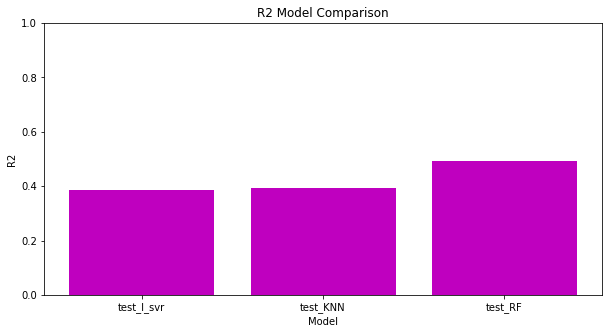

In [278]:
# plort showing the R2 for the different models
import numpy as np
labs = np.array(['test_RF', 'test_l_svr', 'test_KNN'])
error_vals = np.array([0.494, 0.386, 0.395 ])

# format bars
ind = np.arange(error_vals.shape[0])
sorts = np.argsort(error_vals)

# Plots Mean Absolute Variance bars across functions
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(ind, error_vals[sorts], align = 'center', color='m')
plt.xticks(ind, labs[sorts])
plt.xlabel('Model')
plt.ylabel('R2')
plt.title('R2 Model Comparison')
plt.ylim(0, 1)
plt.show()




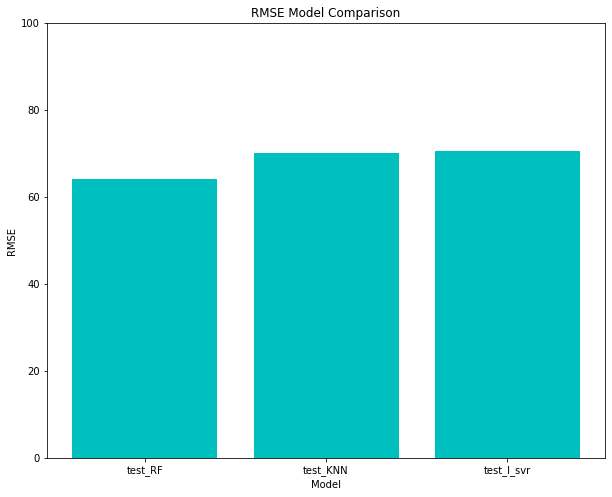

In [281]:
# plort showing the RMSE for the different models
import numpy as np
labs = np.array(['test_RF', 'test_l_svr', 'test_KNN'])
error_vals = np.array([64.13, 70.64, 70.08 ])

# format bars
ind = np.arange(error_vals.shape[0])
sorts = np.argsort(error_vals)

# Plots Mean Absolute Variance bars across functions
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.bar(ind, error_vals[sorts], align = 'center', color='c')
plt.xticks(ind, labs[sorts])
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE Model Comparison')
plt.ylim(0, 100)
plt.show()


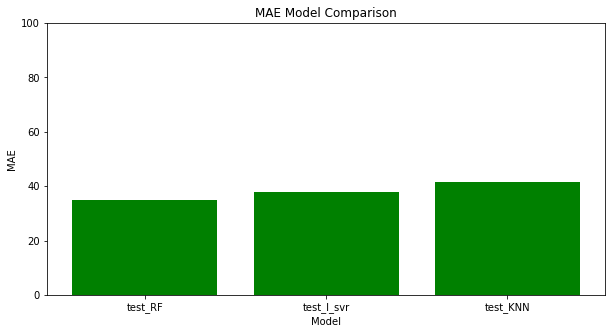

In [280]:
# plort showing the MAE for the different models
import numpy as np
labs = np.array(['test_RF', 'test_l_svr', 'test_KNN'])
error_vals = np.array([35.07, 37.88, 41.39 ])

# format bars
ind = np.arange(error_vals.shape[0])
sorts = np.argsort(error_vals)

# Plots Mean Absolute Variance bars across functions
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(ind, error_vals[sorts], align = 'center', color='g')
plt.xticks(ind, labs[sorts])
plt.xlabel('Model')
plt.ylabel('MAE')
plt.title('MAE Model Comparison')
plt.ylim(0, 100)
plt.show()